

```
# This is formatted as code
```

**Assignment 3 – End-to-end Machine Learning project
Here, we load a data set from github as a zip file and access the train and test csv files. After analysing the data and visualizing it, we train different machine learning models and compare the accuracy of each model. 
**



<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# STEP 1: Setup


In [27]:
# Importing the required libraries
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tarfile
import urllib.request
from zipfile import ZipFile
from urllib.request import urlopen
import io


# STEP 2: Get the data


In [2]:
# accessing the data from github as a zip file and extracting it through io function
path = urlopen('https://raw.githubusercontent.com/aiforsec/RIT-DSCI-633-FDS/main/Assignments/titanic.zip').read()

zip = ZipFile(io.BytesIO(path))
test = pd.read_csv(zip.open('test.csv'))
train = pd.read_csv(zip.open('train.csv'))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# STEP 3: Data Manpulation and Analysis using Pandas framework


In [3]:
# Displaying the data and analsing it
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.columns.values)
print(test.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# replacing the missing values with mean
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)
train['Fare'].fillna(test['Fare'].median(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# STEP 4: Discover and visualize the data to gain insights

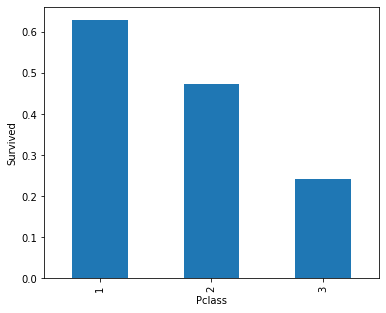

In [11]:
#plotting a bar graph for ordered Pclass against the Survived
bar_plot=train.groupby(["Pclass"])["Survived"].mean()
bar_plot.plot(kind="bar", ylabel="Survived", xlabel="Pclass", figsize=(6, 5))

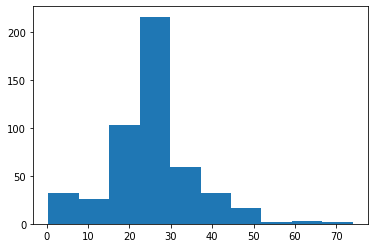

In [12]:
# plotting a histogram for the class 3 against the Age
plot_Pclass = train[train["Pclass"]==3]
plot_Age = plot_Pclass["Age"]
plt.hist(plot_Age)
plt.show()

# STEP 5: Prepare the data for Machine Learning algorithms

In [14]:
# preparing the data for training the model

train_test= [train,test]

for dataset in train_test:
   dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

for tr in train_test:
  tr['Embarked'] = tr['Embarked'].fillna('S') 
  #filling missing embarked value with 'S'
  tr['Embarked'] = tr['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

for tr in train_test:
  age_avg = tr['Age'].mean()
  age_std = tr['Age'].std()
  age_null = tr['Age'].isnull().sum()
  age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null)
  tr['Age'][np.isnan(tr['Age'])] = age_null_random_list
  tr['Age'] = tr['Age'].astype(int)
train['AgeBand'] = pd.cut(train['Age'], 5)
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

for dataset in train_test:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['FareBand'] = pd.qcut(train['Fare'], 4) 
for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [15]:
# dropping the features of less importance
features_drop = ['Name', 'Parch', 'Ticket', 'Cabin']
# dropping the first column( passengerId) of the train data
train = train.drop(features_drop, axis=1)
# dropping the first column( passengerId) of the test data
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()
#printing the dimesions of the train and test data
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

# STEP 6: Select and train a model 
**Here we use different Machine Learning algorithms to find the most optimal one for the titanic dataset**

In [16]:
#importing required libraires and packages for the models used
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' % Accurate Prediction')

79.12 % Accurate Prediction


In [18]:
#Support Vector Machine (SVM)
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + ' % Accurate Prediction')

81.71 % Accurate Prediction


In [19]:
# Linear SVM
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + ' % Accurate Prediction')

78.56 % Accurate Prediction


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
# KNN
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn) + ' % Accurate Prediction')

83.73 % Accurate Prediction


In [21]:
# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_decision_tree) + ' % Accurate Prediction')

86.31 % Accurate Prediction


In [22]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_random_forest)+' % Accurate Prediction')

86.31 % Accurate Prediction


# STEP 7: Comparing the Accuracy


In [23]:
# We tabulate the scores for each of the Machine learning algorithms used
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,86.31
5,Random Forest,86.31
3,KNN,83.73
1,Support Vector Machines,81.71
0,Logistic Regression,79.12
2,Linear SVC,78.56


# STEP 8: Fine-tune your model

In [26]:
#fine tuning the model to prevent overfitting and acheive the desired output
y_new = train['Survived']
X_new = train.drop('Survived', axis = 1)
X_new = train.drop('SibSp', axis = 1)

clf = SVC()
clf.fit(X_new, y_new)
y_pred_svc = clf.predict(X_new)
acc_svc = round(clf.score(X_new, y_new) * 100, 2)
print (str(acc_svc) + ' % Accurate Prediction')

100.0 % Accurate Prediction


#END OF CODE
**BHARADWAJ SHARMA KASTURI**

BK5953@RIT.EDU